# Hbond moving average and RMSD 


This section explains technical details in order to answer questions in
{numref}`questions`. We advise you to take a look at questions first.

To load the trajectory use the VMD program on your local machine if you use Windows or use [vdi.epfl.ch](https://vdi.epfl.ch) if you have a Mac. 

Connect to EPFL VPN before starting this process (This may cause problems if you reside in a FMEL residence). 

To upload your files to the VDI file system you can use MyNAS [https://mynas.epfl.ch/index.php](https://mynas.epfl.ch/index.php) to find out the correct url.

On Mac e.g the Url you can put into Finder is similar to this: `smb://files[0-9].epfl.ch/dit_files[0-9]_indiv/data/username`. The trajectory files can then be dragged into this folder and they will appear in the VDI. 


In VMD load the trajectory by clicking on `File` → `Load new molecule`. 
Here first select the `trp_cage_gb.prmtop` file and the load the `trp_cage_gb.nc` into the same molecule. 


(rmsd)=
## RMSD Alignment and Calculation 

To perform an RMSD fit of two structures (or trajectories) and to
calculate the change in RMSD over time, load both structures into VMD as
new molecules. Click on
`Extensions→Analysis→RMSD Trajectory Tool` which
will show an `RMSD Trajectory Tool` window. In the `Trajectory` panel,
select `Plot`. In the `Reference Mol` panel, click `Selected`, and in
the `Selection Modifiers` panel, click `Backbone`. Select the structure
you wish to compare against (e.g 1L2Y) to designate it as the reference
structure for the RMSD calculation. Finally, click `ALIGN` to first
align the structures or MD trajectory to the reference structure, and
once this is completed, click `RMSD` to produce the RMSD graph.

## Hydrogen-Bond Analysis

To select individual hydrogen bonds, simply select `Mouse→`
`Label→` `Bonds` (or press 2 on your keyboard) and select the
appropriate polar atom and hydrogen. To monitor changes in this distance
throughout the trajectory, click `Graphics→ Labels...` to open
the `Labels` window. Select `Bonds` from the drop-down menu, and click
`Graph...` from the `Graph` tab with the hydrogen bond preselected.

To monitor changes in the total number of hydrogen bonds present within
the molecule over the course of the trajectory, you can click
`Extensions→ Analysis→ Hydrogen Bonds` to open the
`Hydrogen Bonds` window. Select the correct molecule from the `Molecule`
field, leave `Selection 1` as 'protein' and enter `0:4999` within the
`Frames` text field. Select `Only polar atoms` and leave the
`Donor-Acceptor distance` and `Angle cut-off` at 3 and 20 respectively.
Plot the data using `MultiPlot`, and also write output to a file named
`hbonds.dat`. Finally, select `Find hydrogen bonds`.

## Plotting the content

For this we can use numpy and matplotlib:

**Note:** the moving average is centred on each
data point, therefore the last $\frac{windowsize}{2}$ data points will
not be representative.

Download the `hbonds.dat` file and upload it either to Google Colab or noto.epfl.ch. 



In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
hbonds=np.loadtxt('hbonds.dat')


In [7]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [20]:
mavg=moving_average(hbonds[:,1], 100)

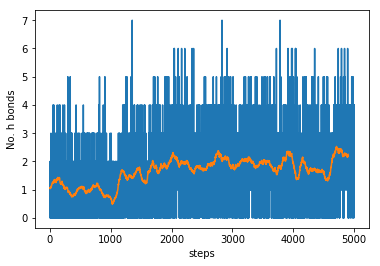

In [25]:
fig, ax = plt.subplots(1)

ax.plot(hbonds[:,1])
ax.plot(mavg)
ax.set_xlabel('steps')
ax.set_ylabel('No. h bonds')
plt.show()